In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("car_price_dataset.csv")
df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   ModelYear     10000 non-null  int64  
 2   EngineSize    10000 non-null  int64  
 3   Horsepower    9500 non-null   float64
 4   Mileage       9500 non-null   float64
 5   FuelType      9500 non-null   object 
 6   Transmission  10000 non-null  object 
 7   Seats         10000 non-null  int64  
 8   OwnerCount    10000 non-null  int64  
 9   Price         10000 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.shape

(10000, 10)

In [5]:
df.isnull().sum()

Brand             0
ModelYear         0
EngineSize        0
Horsepower      500
Mileage         500
FuelType        500
Transmission      0
Seats             0
OwnerCount        0
Price             0
dtype: int64

In [6]:
df.isnull().sum().sum()

np.int64(1500)

In [7]:
df['Horsepower'].fillna(df['Horsepower'].median(), inplace = True)
df['Mileage'].fillna(df['Mileage'].median(), inplace = True)
df['FuelType'].fillna(df['FuelType'].mode()[0], inplace = True)

C:\Users\karan\AppData\Local\Temp\ipykernel_3832\37074708.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Horsepower'].fillna(df['Horsepower'].median(), inplace = True)
C:\Users\karan\AppData\Local\Temp\ipykernel_3832\37074708.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [8]:
df.isnull().sum().sum()

np.int64(0)

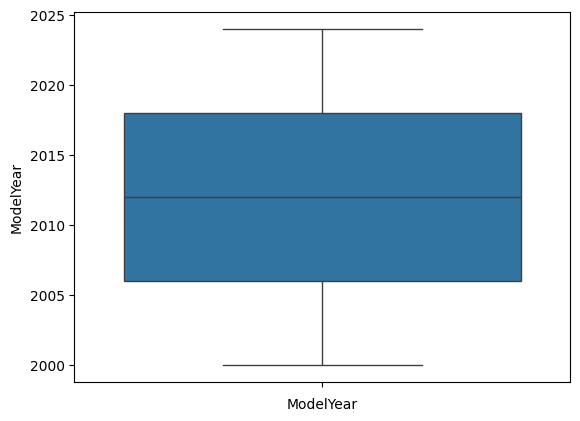

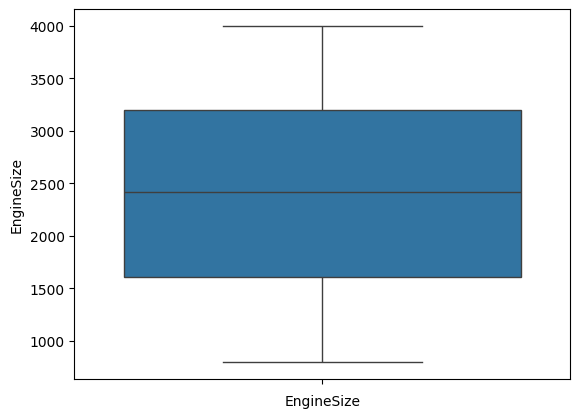

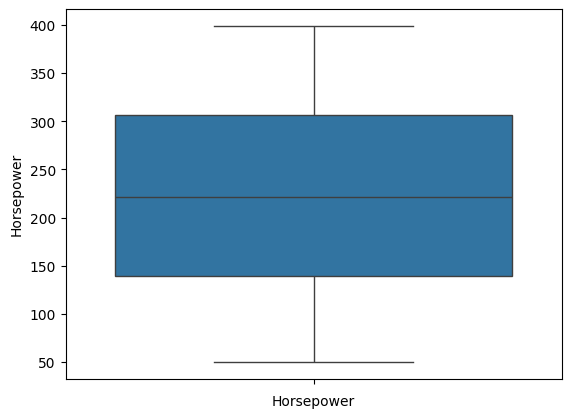

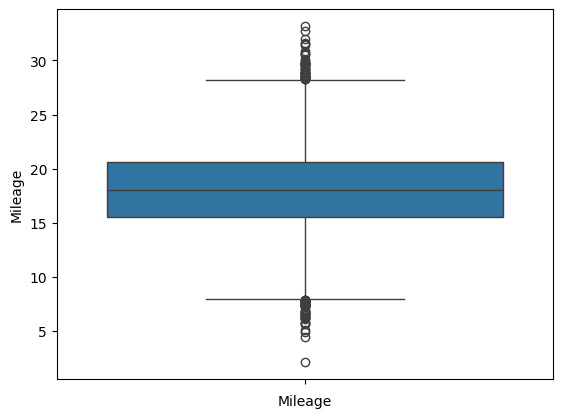

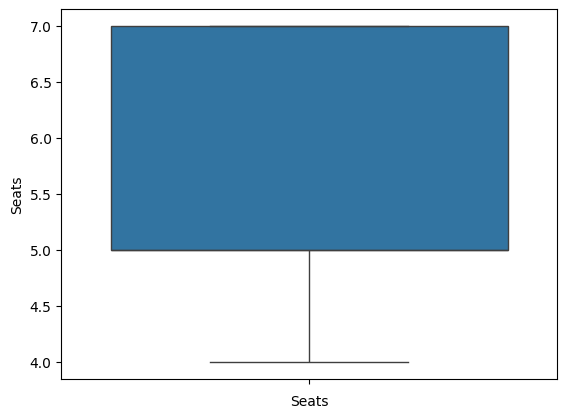

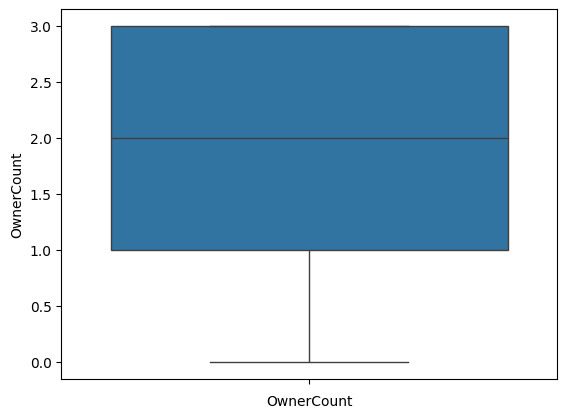

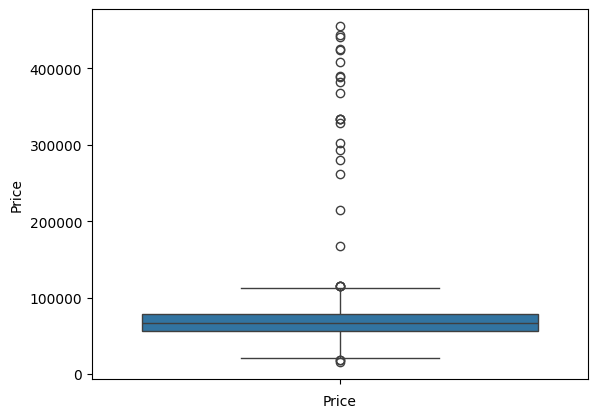

In [9]:
for i in df.columns:
    if df[i].dtypes != 'object':
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
cat_col = df.select_dtypes(include='object')
le = LabelEncoder()

In [11]:
for i in cat_col.columns:
    df[i] = le.fit_transform(df[i])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  int64  
 1   ModelYear     10000 non-null  int64  
 2   EngineSize    10000 non-null  int64  
 3   Horsepower    10000 non-null  float64
 4   Mileage       10000 non-null  float64
 5   FuelType      10000 non-null  int64  
 6   Transmission  10000 non-null  int64  
 7   Seats         10000 non-null  int64  
 8   OwnerCount    10000 non-null  int64  
 9   Price         10000 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 781.4 KB


In [13]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
col_list = []
for i in df.columns:
    if(i != 'Price'):
        col_list.append(i)
# Apply VIF
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Column_name'] = X.columns
vif_data['VIF Score'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Column_name,VIF Score
0,Brand,3.330790
1,ModelYear,65.421228
2,EngineSize,7.829313
3,Horsepower,6.064876
4,Mileage,22.569644
5,FuelType,2.619893
6,Transmission,1.998791
7,Seats,25.126631
8,OwnerCount,2.808782


In [15]:
df = df.drop(['ModelYear'], axis = 1)

In [16]:
col_list = []
for i in df.columns:
    if (i != 'Price'):
        col_list.append(i)
# Apply VIF
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Columns_Name'] = X.columns
vif_data['VIF Score'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Columns_Name,VIF Score
0,Brand,3.217872
1,EngineSize,7.007337
2,Horsepower,5.523859
3,Mileage,15.207512
4,FuelType,2.562799
5,Transmission,1.967713
6,Seats,15.943269
7,OwnerCount,2.726191


In [17]:
df = df.drop(['Seats'], axis = 1)

In [18]:
col_list = []
for i in df.columns:
    if (i != 'Price'):
        col_list.append(i)
# Apply VIF
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Columns_Name'] = X.columns
vif_data['VIF Score'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Columns_Name,VIF Score
0,Brand,3.140806
1,EngineSize,6.518518
2,Horsepower,5.275456
3,Mileage,10.710542
4,FuelType,2.515696
5,Transmission,1.956852
6,OwnerCount,2.685992


In [19]:
df = df.drop(['Mileage'], axis = 1)

In [20]:
col_list = []
for i in df.columns:
    if (i != 'Price'):
        col_list.append(i)
# Apply VIF
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Columns_Name'] = X.columns
vif_data['VIF Score'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Columns_Name,VIF Score
0,Brand,2.933790
1,EngineSize,5.133113
2,Horsepower,4.486806
3,FuelType,2.392215
4,Transmission,1.895073
5,OwnerCount,2.552661


In [21]:
## Build Model

In [22]:
x = df[['Brand', 'EngineSize','Horsepower','FuelType','Transmission','OwnerCount']]
y = df['Price']

In [23]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
y_pred = lr.predict(x_test)

In [27]:
y_pred

array([80118.71870794, 60827.55878564, 60475.97282379, ...,
       68993.37815995, 65711.62205674, 52949.59973062], shape=(2000,))

In [28]:
y_test

6252    65142.522037
4684    62836.954625
1731    58975.010811
4742    61115.666217
4521    71424.521913
            ...     
6412    68142.651688
8285    79469.047194
7853    60247.109238
1095    78960.600157
6929    51555.376933
Name: Price, Length: 2000, dtype: float64

In [29]:
df1 = pd.DataFrame()
df1['Actual Price'] = y_test
df1['Predicted Price'] = y_pred
df1

,Actual Price,Predicted Price
6252,65142.522037,80118.718708
4684,62836.954625,60827.558786
1731,58975.010811,60475.972824
4742,61115.666217,68268.694285
4521,71424.521913,84318.793246
...,...,...
6412,68142.651688,61383.018970
8285,79469.047194,85849.915826
7853,60247.109238,68993.378160
1095,78960.600157,65711.622057


In [30]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred) * 100)

44.55607019527109
